# Counting words in a book
In this notebook we will create a graph showing word counts of 20 most frequent words in a book downloaded from Project Gutenberg site.

In [1]:
# importing necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import re
import requests

%matplotlib inline

## Downloading the book.
First, we need the actual book. For this exercise I chose <a href="http://www.gutenberg.org/ebooks/39805">"Practical Boat-Sailing: A Concise and Simple Treatise"</a> by Douglas Frazar.<br>
We'll download the book from Project Gutenberg site using requests module.


In [2]:
r = requests.get("http://www.gutenberg.org/ebooks/39805.txt.utf-8")
book = r.text

# quick sanity check; have we downloaded what we wanted?
print(book[:450])

﻿The Project Gutenberg EBook of Practical Boat-Sailing, by Douglas Frazar

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Practical Boat-Sailing
       A Concise and Simple Treatise

Author: Douglas Frazar

Release Dat


The downloaded text contains some additional publishing information that we could edit out, but for now, let's assume that the amount of it is small enough (in the context of the rest of the file), so it will not influence our list of top 20 words.

## Parsing the text.
Now we need to count the words.
We start by extracting list of all the words using a regular expression.

In [3]:
all_words = re.findall(r'\w+', book)
print(len(all_words))
all_words[500:505]

34815


['own', 'canoe', 'If', 'the', 'author']

Using extracted word list we create dictionary of word frequencies, ignoring word casing.

In [4]:
word_counts = {}
for word in all_words:
    wl = word.lower()
    if wl in word_counts:
        word_counts[wl] += 1
    else:
        word_counts[wl] = 1

len(word_counts)

3541

Transform dictionary into a pandas Series

In [5]:
words = pd.Series(word_counts, name="words")
words.sort_values(ascending=False, inplace=True)
words.head(10)

the    2938
to     1185
and    1109
of     1038
a       929
is      695
in      591
it      395
be      387
or      347
Name: words, dtype: int64

After sorting the series, we can see that the most frequent words are in fact english stop words.<br>
Let's filter them out. <br>

In [6]:
# list of english stop words found on the internet
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [7]:
no_sw_index = [word for word in words.index if word not in stop_words]
no_sw = words.loc[no_sw_index]
no_sw.head(20)

yacht        299
wind         221
one          163
sail         128
boat         104
side         103
anchor        98
gutenberg     93
upon          93
two           91
project       87
1             82
e             79
way           74
may           74
water         74
jib           73
line          71
go            70
sea           68
Name: words, dtype: int64

Our word data still contains unwanted values such as "1" or "e". Let's remove all "words" of length less than 2.

In [8]:
no_sw = no_sw[no_sw.index.str.len() >= 2]
no_sw.head(20)

yacht        299
wind         221
one          163
sail         128
boat         104
side         103
anchor        98
gutenberg     93
upon          93
two           91
project       87
way           74
may           74
water         74
jib           73
line          71
go            70
sea           68
sheet         66
weather       65
Name: words, dtype: int64

Having finished assembling the list we can condense all the steps into one handy function. Just in case, because who knows? Maybe we will need to reuse it later...

In [9]:
def most_frequent_words(list_of_words, len_of_result=20):
    '''
    Function returns pandas Series containing most frequent words from the list
    sorted in descending order. English stop words are removed.
    '''

    # list of english stop words found on the internet
    stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

    word_counts = {}
    for word in list_of_words:
        wl = word.lower()
        if (wl in stop_words) or len(wl) < 2:
            continue
        elif wl in word_counts:
            word_counts[wl] += 1
        else:
            word_counts[wl] = 1

    words = pd.Series(word_counts, name="words")
    words.sort_values(ascending=False, inplace=True)
    
    return words.head(len_of_result)

## Just plot it.
After sorting and filtering our data, it's time to plot the results and take a closer look.

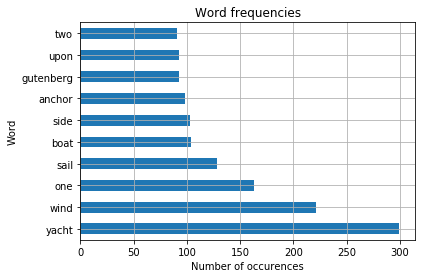

In [10]:
%matplotlib inline
no_sw.head(10).plot(kind='barh', grid=True, legend=False)
plt.title("Word frequencies")
plt.xlabel("Number of occurences")
plt.ylabel("Word")
plt.show()


## Few steps back...
And here we are up for a small surprise.<br>
Word "gutenberg" does not seem to be very related to sailing and it is 9nth position on our list! It's time to take a few steps back and revisit the assumption about a small enough amount of publishing info.
First, let's take a look at the distribution of word "gutenberg" over the contents of the text.


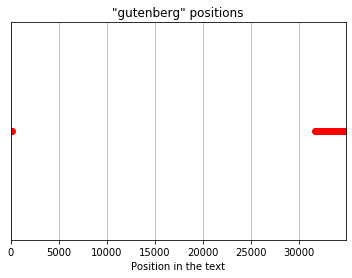

In [11]:
def plot_words_locations(word, all_words_list):
    """
    Function plots occurences of the given word and returns list of it's positions
    """
    word_locations = []

    for position, w in enumerate(all_words_list):
        if w.lower() == word:
            word_locations.append(position)

    plt.plot(word_locations, [0]*len(word_locations), 'ro')
    plt.grid()
    plt.title(f'"{word}" positions')
    plt.xlim([0, len(all_words_list)])
    plt.xlabel('Position in the text')
    plt.yticks([])
    plt.show()

    return word_locations

gutenberg_locations = plot_words_locations("gutenberg", all_words)

"gutenberg" appears only in small part at the beginning and a bigger one at the end of the whole text. We'll use it to remove parts of the text containing publishing information.

But first, let's look at some other words from our list to see if we are not mistaken.

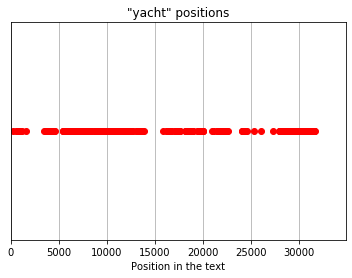

In [12]:
_ = plot_words_locations("yacht", all_words)

"yacht" is definitely a sailing-related word and we can see that on the graph. 

"yacht" is absent in the last part which we assumed to be publishing info.

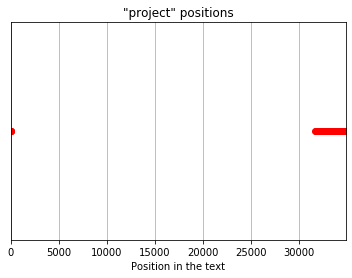

In [13]:
_ = plot_words_locations("project", all_words)

Quick look at another slightly suspicious word from our list - "project" (as in "Project Gutenberg").
It's time to filter the text and see how our list will change.

## Filtering
Word "gutenberg" will serve as a marker for redundant parts of text.

In [14]:
import numpy as np

gutenberg_locations = np.array(gutenberg_locations)

# after quick look at the graph we can select estimated limits of book's content
beginning = gutenberg_locations[gutenberg_locations < 3000][-1] + 1
end = gutenberg_locations[gutenberg_locations > 30000][0]

# cutting out the publishing part
filtered_all_words = all_words[beginning:end]

In [15]:
len(filtered_all_words) / len(all_words)

0.9078845325290823

After removing publishing information we lost almost 10% of previous words.

## Just plot it. Again.
Let's take a look at the most frequent words and see how the list has changed.


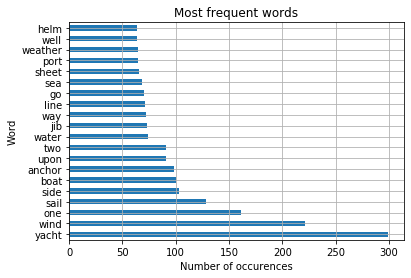

In [16]:
most_frequent_20 = most_frequent_words(filtered_all_words)

most_frequent_20.plot(kind='barh', grid=True, legend=False)
plt.title("Most frequent words")
plt.xlabel("Number of occurences")
plt.ylabel("Word")
plt.show()

Words "project" and "gutenberg" are gone and we have our final list of most frequent words in "Practical Boat-Sailing: A Concise and Simple Treatise" by Douglas Frazar.